In [4]:
import os, re, cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import tensorflow as tf
from tensorflow import keras


def sort_string(filename):
    # list.sort(key=lambda x: (len(str(sort_string(x))), sort_string(x)))
    match = re.search(r'\d+', filename)
    if match:
        number_str = match.group(0)
        return int(number_str)
    return 0


In [ ]:
root_path = "Dataset\Dataset_BUSI_with_GT"

deleted_files = []

for sub in os.listdir(root_path):
    subfolder_path = os.path.join(root_path, sub)
    mask_files = [filename for filename in os.listdir(subfolder_path) if re.match(r'^(.*)_mask(_\d+)?\.png$', filename)]
    base_names = defaultdict(list)

    for filename in mask_files:
        match = re.match(r'^(.*)_mask(_\d+)?\.png$', filename)
        if match:
            base_name = match.group(1)
            base_names[base_name].append(filename)
    for base_name, files in base_names.items():
        combined_mask = None
        for filename in files:
            file_path = os.path.join(subfolder_path, filename)
            mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if combined_mask is None:
                combined_mask = mask
            else:
                # Sử dụng phép OR để gộp mask 
                combined_mask = cv2.bitwise_or(combined_mask, mask)
        output_filename = base_name + "_mask.png"
        output_path = os.path.join(subfolder_path, output_filename)
        cv2.imwrite(output_path, combined_mask)
        for filename in files:
            if filename != output_filename:
                file_to_remove = os.path.join(subfolder_path, filename)
                os.remove(file_to_remove)
                deleted_files.append(filename)
    print("Các tệp đã bị xóa:")
    for deleted_file in deleted_files:
        print(deleted_file)
    print(f"Đã gộp thành công các nhãn bị trùng")

In [6]:

IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 256, 256, 1

X_data, Y_data, Y_cls = [], [], []

for sub in os.listdir(root_path):
    subfolder_path = os.path.join(root_path, sub)
    subsubfolder_path = os.listdir(subfolder_path)
    subsubfolder_path.sort(key=lambda x: (len(str(sort_string(x))), sort_string(x)))

    for name in subsubfolder_path:
        image_path = os.path.join(subfolder_path, name)
        img_data = cv2.imread(image_path, 0)
        img_data = cv2.resize(img_data, (IMG_WIDTH, IMG_HEIGHT))
        if "mask" in name:
            Y_data.append(img_data)
            Y_cls.append(sub)
        else:
            X_data.append(img_data)

print(f"Tổng X_data {len(X_data)}")
print(f"Tổng Y_data {len(Y_data)}")
print(f"Tổng Y_cls {len(Y_cls)}")


Tổng X_data 780
Tổng Y_data 780
Tổng Y_cls 780


In [ ]:
import random

def visual_image_data(number_img= 3):
    random_indices = random.sample(range(len(X_data)), number_img)
    for i, idx in enumerate(random_indices, 1):
        plt.figure(figsize=(10, 5))

        plt.subplot(131)
        plt.imshow(X_data[idx], cmap='gray')
        plt.title(f'X_train - Thứ tự: {idx}')

        plt.subplot(132)
        plt.imshow(Y_data[idx], cmap='gray')
        plt.title(f'Y_train - Thứ tự: {idx}')

        plt.subplot(133)
        plt.imshow(X_data[idx], cmap='gray')
        plt.imshow(Y_data[idx], alpha=0.5)
        plt.title(f"Label {Y_cls[idx]}")

        plt.show()

# visual_image_data()

In [17]:
from keras.utils import to_categorical


X_data=np.array(X_data)
X_data=np.expand_dims(X_data,axis=-1)

Y_data=np.array(Y_data)
Y_data=np.expand_dims(Y_data,axis=-1)


# Y_cls (one-hot encoding)
num_classes = 3  # Số lượng lớp
mapping_dict = {'malignant': 0, 'normal': 1, 'benign': 2}
Y_cls_mapped = list(map(mapping_dict.get, Y_cls))



Y_cls_one_hot = to_categorical(Y_cls_mapped, num_classes=num_classes)
print(f"Shape Y_cls_one_hot {Y_cls_one_hot.shape}")
print(f"Shape X_data {X_data.shape}")
print(f"Shape Y_data {Y_data.shape}")

 
 Đã Chuyển đổi X_train thành một mảng NumPy sau đó tạo thành một tensor 4 chiều 
Shape Y_cls_one_hot (780, 3)
Shape X_data (780, 256, 256, 1)
Shape Y_data (780, 256, 256, 1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test, Y_cls_train, Y_cls_test = train_test_split(X_data,
                                                                             Y_data,
                                                                             Y_cls_one_hot,
                                                                             test_size=0.5,
                                                                             random_state=42)

print(f' \n Đã load xong vào X_train {len(X_train)} tấm ảnh và Y_train {len(Y_train)} tấm ảnh')
print(f' \n Đã load xong vào X_test {len(X_test)} tấm ảnh và Y_test {len(Y_test)} tấm ảnh')

print(f' \n => Y_cls dùng để phân lớp Đã load xong vào Y_cls_train {len(Y_cls_train)} tấm ảnh và Y_cls_test {len(Y_cls_test)} tấm ảnh \n ' )

print(f"Shape X_train {X_train.shape}")
print(f"Shape X_test {X_test.shape}")

print(f"Shape Y_train {Y_train.shape}")
print(f"Shape Y_test {Y_test.shape}")

print(f"Shape Y_cls_train {Y_cls_train.shape}")
print(f"Shape Y_cls_test {Y_cls_test.shape}")


 
 Đã load xong vào X_train 390 tấm ảnh và Y_train 390 tấm ảnh
 
 Đã load xong vào X_test 390 tấm ảnh và Y_test 390 tấm ảnh
 
 => Y_cls dùng để phân lớp Đã load xong vào Y_cls_train 390 tấm ảnh và Y_cls_test 390 tấm ảnh 
 
Shape X_train (390, 256, 256, 1)
Shape X_test (390, 256, 256, 1)
Shape Y_train (390, 256, 256, 1)
Shape Y_test (390, 256, 256, 1)
Shape Y_cls_train (390, 3)
Shape Y_cls_test (390, 3)


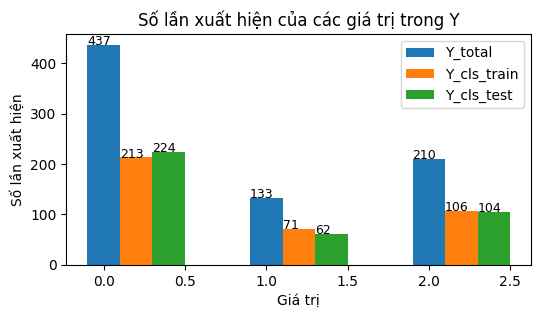

In [19]:
def plot_label_counts_multi(*args, names=None):
    plt.figure(figsize=(6, 3))

    for i, Y_name in enumerate(args):
        unique_values, counts = np.unique(Y_name, return_counts=True, axis=0)

        x_values = np.arange(len(unique_values)) + i * 0.2
        bars = plt.bar(x_values, counts, align='center', width=0.2, label=names[i] if names else f'Y_{i + 1}')
        for bar, count in zip(bars, counts):
            plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(count)), fontsize=9)

    plt.xlabel('Giá trị')
    plt.ylabel('Số lần xuất hiện')
    plt.title('Số lần xuất hiện của các giá trị trong Y')
    plt.legend()
    plt.show()

plot_label_counts_multi(Y_cls_one_hot, Y_cls_train, Y_cls_test, names=["Y_total" ,"Y_cls_train", "Y_cls_test"])

In [ ]:

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19


def Conv2dBlock(inputTensor, numFilters, kernelSize=3, doBatchNorm=True):
    x = Conv2D(filters=numFilters, kernel_size=(kernelSize, kernelSize),
                               kernel_initializer='he_normal', padding='same')(inputTensor)
    if doBatchNorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=numFilters, kernel_size=(kernelSize, kernelSize),
                               kernel_initializer='he_normal', padding='same')(x)
    if doBatchNorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

pretrained_model = VGG19(include_top=False,
                                             input_shape=(256, 256, 3),
                                             pooling='max',
                                             classes=3,
                                             weights='imagenet')
pretrained_model.trainable = False

def Unet_base(inputImage, numFilters=16, dropout=0.1, doBatchNorm=True):
    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize=3, doBatchNorm=doBatchNorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = Conv2dBlock(p1, numFilters * 2, kernelSize=3, doBatchNorm=doBatchNorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = Conv2dBlock(p2, numFilters * 4, kernelSize=3, doBatchNorm=doBatchNorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = Conv2dBlock(p3, numFilters * 8, kernelSize=3, doBatchNorm=doBatchNorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = Conv2dBlock(p4, numFilters * 16, kernelSize=3, doBatchNorm=doBatchNorm)


    u6 = Conv2DTranspose(numFilters * 8, (3, 3), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = Conv2dBlock(u6, numFilters * 8, kernelSize=3, doBatchNorm=doBatchNorm)

    u7 = Conv2DTranspose(numFilters * 4, (3, 3), strides=(2, 2), padding='same')(c6)

    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = Conv2dBlock(u7, numFilters * 4, kernelSize=3, doBatchNorm=doBatchNorm)

    u8 = Conv2DTranspose(numFilters * 2, (3, 3), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = Conv2dBlock(u8, numFilters * 2, kernelSize=3, doBatchNorm=doBatchNorm)

    u9 = Conv2DTranspose(numFilters * 1, (3, 3), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = Conv2dBlock(u9, numFilters * 1, kernelSize=3, doBatchNorm=doBatchNorm)

    output = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    return Model(inputs=[inputImage], outputs=[output])



def VGG19_cls(inputImage, dropout= 0.3):
    cls2 = Conv2D(3, (1, 1), activation='relu', padding='same')(inputImage)
    vgg19 = pretrained_model(cls2)
    flatten = Flatten()(vgg19)
    dense1 = Dense(1024, activation='relu')(flatten)
    dropout1 = Dropout(dropout)(dense1)

    dense2 = Dense(512, activation='relu')(dropout1)
    dropout2 = Dropout(dropout)(dense2)

    dense3 = Dense(256, activation='relu')(dropout2)
    dropout3 = Dropout(dropout)(dense3)

    dense4 = Dense(128, activation='relu')(dropout3)
    dropout4 = Dropout(dropout)(dense4)

    dense5 = Dense(64, activation='relu')(dropout4)
    dropout5 = Dropout(dropout)(dense5)

    dense6 = Dense(32, activation='relu')(dropout5)
    dropout6 = Dropout(dropout)(dense6)

    dense7 = Dense(16, activation='relu')(dropout6)

    cls_out = Dense(3, activation='softmax')(dense7)

    return Model(inputs=[inputImage], outputs=[cls_out])


VGG_19 = VGG19_cls(Input((256, 256, 1)), dropout= 0.3)
Unet = Unet_base(Input((256, 256, 1)), dropout= 0.3)






In [21]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 


UGG_19 = Sequential()
UGG_19.add(Unet)
UGG_19.add(VGG_19)
# UGG_19.summary()


In [23]:
UGG_19.compile('adam', loss="categorical_crossentropy" ,metrics=['accuracy'])
Reduce_LR_cls=ReduceLROnPlateau(monitor='val_accuracy',  patience=20, verbose=1,factor=0.8,min_lr=0.0001)
early_stopping_cls = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, restore_best_weights=True)
callbacks = [Reduce_LR_cls, early_stopping_cls]


In [ ]:
import time

start_time = time.time()

UGG_19_his = UGG_19.fit(X_train,
                        Y_cls_train,
                        validation_split=0.2,
                        shuffle=True,
                        callbacks=callbacks,
                        batch_size = 8,
                        epochs=250)

end_time = time.time()
training_time = end_time - start_time
print(f'Thời gian đào tạo mô hình: {training_time} giây')


UGG_19.save("Save\UGG_19train_7layer.keras")
print("đã save model")

In [ ]:
UGG_19.evaluate(X_train, Y_cls_train)

In [26]:

np.savez('Save\UGG_19_history.npz',
         loss=UGG_19_his.history['loss'],
         val_loss=UGG_19_his.history['val_loss'],
         accuracy=UGG_19_his.history.get('accuracy', []),
         val_accuracy=UGG_19_his.history.get('val_accuracy', []))
print("Đã lưu lịch sử huấn luyện")

Đã lưu lịch sử huấn luyện


In [ ]:
from tensorflow.keras.models import load_model

model_path = "Save\UGG_19train_7layer.keras"
UGG_19 = load_model(model_path)
UGG_19.summary()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns


y_pred_VGG=UGG_19.predict(X_test)


if len(Y_cls_test.shape) > 1:
    y_true_classes = np.argmax(Y_cls_test, axis=1)
else:
    y_true_classes = Y_cls_test

y_pred_classes = np.argmax(y_pred_VGG, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
# print(conf_matrix)
class_labels = ["Benign", "Malignant", "normal"]  


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("Save\confusion_matrix_UGG_19train_7layer.png")
plt.show()




In [ ]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f"\n Accuracy: {accuracy}")
print(f"\n Recall: {recall}")
print(f"\n F1: {f1}")


In [ ]:

def visual(history, model_name):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], 'r', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')
    plt.title(f'Loss - {model_name}')
    plt.legend()

    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        plt.subplot(2, 1, 2)
        plt.plot(history.history['accuracy'], 'b', label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], 'b--', label='Validation Accuracy')
        plt.title(f'Accuracy - {model_name}')
        plt.savefig("Save\AccuracyUGG_19train_7layer.png")
        plt.legend()
    else:
        plt.subplot(2, 1, 2)
        plt.axis('off') 
        plt.text(0.5, 0.5, 'No accuracy data available',
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


visual(UGG_19_his, "UGG_19")
